## **Chapter 1:** From Recursion to Dynamic Programming


In [ ]:
def countChar(str, char):
  '''
  you can call helper function as countChar_(str[1:], char)
  '''
  if len(str) <= 0:
    return 0
  if str[0] == char:
    return 1 + countChar_(str[1:], char)
  else:
    return countChar_(str[1:], char)

Ahora, demos un paso atrás y veamos cuál era el objetivo de este ejercicio.

Hay dos cosas que se hizo en este algoritmo:

1 - Se creo un caso base cuando la cadena está vacía

2 - Se hicieron cálculos para un paso y pasaste el resto del trabajo a la llamada recursiva. Aquí el cálculo es simplemente verificar si el primer carácter de la cadena str es un carácter char o no.

Así es exactamente como se escribe un algoritmo recursivo. Primero, intenta encontrar un patrón que se repita y podría ser un paso recursivo. Luego busca los casos base, que especifican alguna condición de terminación para su algoritmo. Por último, escribe el código para el primer paso y pasa el resto del trabajo a las llamadas recursivas.

## Fibonacci



In [3]:
def fib(n):
  if n == 0: # base case 1
    return 0
  if n == 1: # base case 2
    return 1
  else: # recursive step
    return fib(n-1) + fib(n-2)

print (fib(6))

8


Un valor cercano a 50 resultaría en un tiempo de espera en nuestra plataforma. Esto se debe a que nuestro algoritmo tiene una complejidad de tiempo exponencial, más específicamente O(2n^n​).
La recursion para fib(100) tomo mas de 30 minutos en collab.

## Find All Permutations of a String

In [2]:
def permutations(str):
  if str == "": # base case 
  #Nuestro algoritmo tiene solo un caso base de cuando la cadena está vacía y devuelve una lista que contiene una cadena vacía
    return [""]
  permutes = []
  for char in str:
    #hacemos tantas llamadas recursivas a permutaciones como caracteres hay en nuestra cadena.
    subpermutes = permutations(str.replace(char, "", 1))    # recursive step
    #Para cada carácter, char, encontramos permutaciones de str excluyendo ese carácter, y simplemente anteponemos el carácter a los resultados. 
    for each in subpermutes:
      permutes.append(char+each)
      #aqui se encuentra el crux del algoritmo
  return permutes

def main():
  print (permutations("abc"))

main()

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


# Place N Queens on an NxN Chessboard

In [18]:
count = 0;
def isSafe(i, j, board):
  for c in range(len(board)):
    for r in range(len(board)):
      # check if i,j share row with any queen
      if board[c][r] == 'q' and i==c and j!=r: 
        return False
      # check if i,j share column with any queen
      elif board[c][r] == 'q' and j==r and i!=c:
        return False
      # check if i,j share diagonal with any queen
      elif (i+j == c+r or i-j == c-r) and board[c][r] == 'q':
        return False

  return True 

def nQueens(r, n, board):
  # base case, when queens have been placed in all rows return
  if r == n:
    return True, board
  # else in r-th row, check for every box whether it is suitable to place queen
  for i in range(n):
    if isSafe(r, i, board):
      # if i-th columns is safe to place queen, place the queen there and check recursively for other rows
      board[r][i] = 'q'
      okay, newboard = nQueens(r+1, n, board)
      # if all next queens were placed correctly, recursive call should return true, and we should return true here too
      if okay:
        return True, newboard
      # else this is not a suitable box to place queen, and we should check for next box
      board[r][i] = '-'
  return False, board

def placeNQueens(n, board):

  
  return nQueens(0, n, board)[1]

def main():
  n = 10
  board = [["-" for _ in range(n)] for _ in range(n)]
  qBoard = placeNQueens(n, board)
  qBoard =  "\n".join(["".join(x) for x in qBoard])
  print (qBoard)
main()

q---------
--q-------
-----q----
-------q--
---------q
----q-----
--------q-
-q--------
---q------
------q---


In [51]:
count= 0

# Funcion que chequea si es seguro o no
def isSafe(board, r, c):
 

     # retorna falso si dos reinas se encuentran en la misma diagonal `/` izquierda 
    (i, j) = (r, c)
    while i >= 0 and j < len(board):
        if board[i][j] == 'q':
            return False
        i = i - 1
        j = j + 1

    # retorna falso si dos reinas se encuentran en la misma diagonal `\` derecha
    (i, j) = (r, c)
    while i >= 0 and j >= 0:
        if board[i][j] == 'q':
            return False
        i = i - 1
        j = j - 1
 
        
    # retorna falso si dos reinas se encuentran en la misma columna
    for i in range(r):
        if board[i][c] == 'q':
            return False
 
 
    return True
 
 
def count_n_queens_solutions(board):
  # se crea un contador para encontrar las soluciones de un tablero N x N
    global count
    for r in board:
        m = (str(r).replace(',', '').replace('\'', ''))
        
    count= count + 1;
 
 
def nQueen(board, r):
 
    # si `N` reinas se colocan satisfactoriamente, cuenta el numero de soluciones
    if r == len(board):
        count_n_queens_solutions(board)
        return
 
    # place queen at every square in the current row `r`
    # and recur for each valid movement
    for i in range(len(board)):
 
        # si es seguro colocar dos reinas
        if isSafe(board, r, i):
            # coloca la reina en el espacio actual
            board[r][i] = 'q'
 
            # repite para la fila siguiente
            nQueen(board, r + 1)
 
            # retrocede y quita la reina de la casilla actual
            board[r][i] = '–'
 
 
if __name__ == '__main__':
 
    # tablero `N × N`
    N = int(input())
    # `board[][]` realiza un seguimiento de la posición de las reinas en
    # la configuración actual 
    board = [["-" for _ in range(N)] for _ in range(N)]
    nQueen(board, 0)
    print(count)

6
4


# Approaches of Dynamic Programming



*   Bottom-up approach


>  La idea básica del enfoque ascendente es comenzar construyendo primero las unidades más pequeñas y luego usar esas unidades pequeñas para construir unidades cada vez más grandes.

*   Top-down approach


> Esto es igual que recursividad. Se comienza en la parte superior con un problema más grande, haces una llamada recursiva a los subproblemas y esa recursividad desciende hasta llegar a tus casos base. La recursividad es esencialmente el enfoque de arriba hacia abajo. En el enfoque de programación dinámica de arriba hacia abajo, evalúa algo a medida que se necesita y luego puede almacenarlo y reutilizarlo cuando sea necesario nuevamente. 





# Fibonacci with dynamic programation.

In [58]:
import time
import matplotlib.pyplot as plt

calculated = {}

def fib(n):
  if n == 0: # base case 1
    return 0
  if n == 1: # base case 2
    return 1
  elif n in calculated:
    return calculated[n]
  else: # recursive step
    calculated[n] = fib(n-1) + fib(n-2)
    return calculated[n]

showNumbers = True
numbers = 500
print(fib(499))

86168291600238450732788312165664788095941068326060883324529903470149056115823592713458328176574447204501


# **Chapter 2:** Top-Down Dynamic Programming with Memoization

> La recursividad actúa como una forma natural de escribir un algoritmo dinámico de arriba hacia abajo. El proceso de almacenar los resultados evaluados en el enfoque de arriba hacia abajo se llama **memoization**.



> *Memoization: El acto de almacenar los resultados de llamadas de función costosas y recuperarlos de la tienda cuando se necesitan nuevamente para evitar una reevaluación.*

In [59]:
# Se crea un diccionario
dictionary = {}

key = 1
value = "abcd"

# Para agregar un valor a una llave

dictionary[key] = value
#or
dictionary[2] = "abc"

# las llaves y los valores pueden ser cualquier cosa, 
# desde números enteros hasta cadenas y objetos personalizados

dictionary["hello"] = "hi"
dictionary[1.1] = 1

# Una clase personalizada
class Dummy:
  def __init__(self, val):
    self.val = val

# El objeto de una clase personalizada
customObject = Dummy(5)
dictionary[customObject] = 5

# Para iterar sobre un diccionario
for k,v in dictionary.items():
  print (k,":",v)

1 : abcd
2 : abc
hello : hi
1.1 : 1
<__main__.Dummy object at 0x7f586875df10> : 5


## Fibonacci with Memoization.

In [61]:
memo = {} #dictionay for Memoization

def fib(n):
  if n == 0: # caso base 1
    return 0
  if n == 1: # caso base 2
    return 1
  elif n in memo: # Chequear si el resultado para n ya ha sido evaluado
    return memo[n] # devolver el resultado si está disponible
  else: # sino, usar recursividad
    memo[n] = fib(n-1) + fib(n-2) # almacenar el resultado de n en el diccionario de memorización 
    return memo[n] # retornar el valor

print (fib(100))

354224848179261915075



> Esto reduce la complejidad temporal de nuestro algoritmo de O(2n^n​​​) a O(n).




## The Staircase Problem
---

###**Problem Description**


**Task:** Nick is standing next to a staircase that leads to his apartment. The staircase has n total steps; Nick knows he can climb anywhere between 1 and m steps in one jump. He thinks about how many ways there are to climb this staircase. He realizes it is a big number since there are a lot of possible combinations. So, he has asked you to write an algorithm for him that tells him the number of possible ways to climb a staircase given n (number of steps) and, m (number of steps covered in biggest jump).

**Input Format:** Your algorithm will take as input n, the number of steps in the staircase and, m, the number of steps covered in the biggest leap. Nick can jump any number of stairs between 1 and m.


**Output Format:** Your algorithm will return the number of possible ways to climb the staircase.

---



In [ ]:
# Recursion
def staircase(n, m):
  # caso base, no hay escalera
  if n == 0:    
    return 1
  ways = 0
  # iterar sobre el número de pasos, podemos tomar
  for i in range(1,m+1):  
    # si los pasos restantes son más pequeños que el paso de salto, omita
    if i <= n:  
      # llamada recursiva con n-i unidades donde i es el número de pasos dados             
      ways += staircase(n-i, m) 
  return ways

print(staircase(4,2))

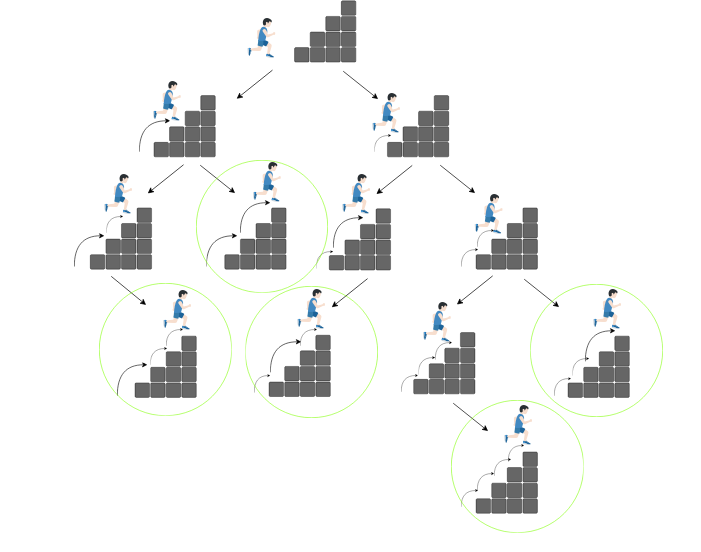

In [62]:
# Recursion with memoization
def nthStair(n, m, memo):
  # caso base, no hay escalera
  if n == 0:    
    return 1
  # antes del paso recursivo comprobar si el resultado se memoriza
  if n in memo: 
    return memo[n]
  ways = 0
  # iterar sobre el número de pasos, podemos tomar
  for i in range(1,m+1):    
    # si los pasos restantes son más pequeños que el paso de salto, omita
    if i <= n:           
      #llamada recursiva con n-i unidades menos, donde i es el número de pasos dados   
      ways += nthStair(n-i, m, memo) 
  # 'memoize' los resultandos antes de regresar
  memo[n] = ways   
  return ways

def staircase(n, m):
  memo = {}
  # función de ayuda para agregar memos diccionario a la función
  return nthStair(n, m, memo) 

print(staircase(100, 6))

290078479914610587823630044098




> Ahora la escalera (i, m) se evaluará solo una vez para cada valor de i de 1 a n. Para cada llamada de este tipo, solo tendremos que agregar valor para cada valor de escaleras, es decir, 1 a m. Por lo tanto, al igual que los números de Fibonacci, no tendremos una estructura en forma de árbol. De esta forma, la complejidad temporal será O(nm).




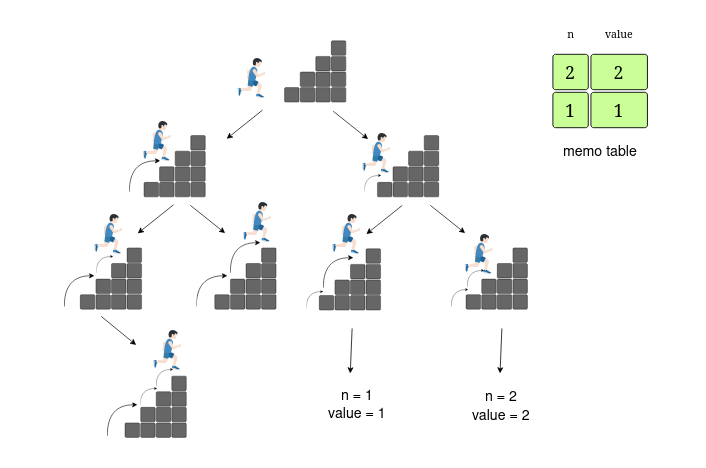

## The Staircase Problem
---

##**Problem Description**


**Task:** Given a list of weights and a list of costs, find the optimal subset of things that form the highest cumulative price bounded by the capacity of the knapsack.

**Input Format:** As input, your function will get a list of weights, a list of prices, and an integer capacity denoting the total weight the knapsack can carry. weights and prices are aligned to each other, i.e., weight and price of the first object are given by weights[0] and prices[0] respectively.

**Output Format:** Your function will return the maximum possible profit, i.e., the sum of prices of goods selected based on weights and prices bound by capacity.

---



In [63]:
# recursion simple
def solveKnapsack(weights, prices, capacity, index):
  # caso base de cuando nos hemos quedado sin capacidad u objetos
  if capacity <= 0 or index >= len(weights): 
    return 0
  # si el peso en la posición del índice es mayor que la capacidad, omita este objeto
  if weights[index] > capacity: 
    return solveKnapsack(weights, prices, capacity, index + 1)
  # llamada recursiva, podemos incluir el objeto index-th o no podemos,
  # verificamos ambas posibilidades y devolvemos la más óptima usando max
  return max(prices[index]+solveKnapsack(weights, prices, capacity - weights[index], index+1),
        solveKnapsack(weights, prices, capacity, index + 1))

def knapsack(weights, prices, capacity):
  return solveKnapsack(weights, prices, capacity, 0)

print(knapsack([2,1,1,3], [2,8,1,10], 4))

18




> Si tenemos n objetos, encontramos todos los conjuntos donde cualquier objeto está en el conjunto o no lo está. Esto significa que estamos buscando todos los subconjuntos posibles de un conjunto de n objetos. ¿Cuántos subconjuntos existen para un conjunto de n objetos? 2n^n por lo que la complejidad del tiempo es **O(2n^n​​)**.

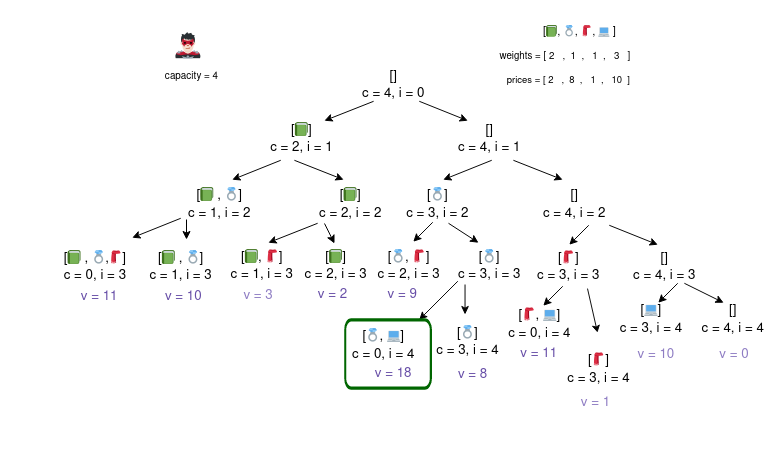



In [66]:
# Con Memoization
def solveKnapsack(weights, prices, capacity, index, memo):
  # caso base de cuando nos hemos quedado sin capacidad u objetos
  if capacity <= 0 or index >= len(weights): 
    return 0
  # verifique la solución en la memo
  if (capacity, index) in memo: 
    return memo[(capacity, index)]
  # si el peso en la posición del índice es mayor que la capacidad, omita este objeto
  if weights[index] > capacity: 
    # guardar resultado en memo
    memo[(capacity, index)] = solveKnapsack(weights, prices, capacity, index + 1, memo) 
    return memo[(capacity, index)] 
  # llamada recursiva, podemos incluir el objeto index-th o no podemos,
  # verificamos ambas posibilidades y devolvemos la más óptima usando max 
  memo[(capacity, index)] = max(prices[index]+solveKnapsack(weights, prices, capacity - weights[index], index+1, memo),
        solveKnapsack(weights, prices, capacity, index + 1, memo)) 
  return memo[(capacity, index)]

def knapsack(weights, prices, capacity):
  # crear un diccionario memo
  memo = {} 
  return solveKnapsack(weights, prices, capacity, 0, memo)

print(knapsack([2,1,1,3], [2,8,1,10], 50))

21




> La complejidad del tiempo después de la memorización es O(C×n) aquí C no es una constante sino una variable. Por lo tanto, la complejidad del tiempo no es lineal.



# **Chapter 4:** Practice Problems

> La recursividad actúa como una forma natural de escribir un algoritmo dinámico de arriba hacia abajo. El proceso de almacenar los resultados evaluados en el enfoque de arriba hacia abajo se llama **memoization**.



> *Memoization: El acto de almacenar los resultados de llamadas de función costosas y recuperarlos de la tienda cuando se necesitan nuevamente para evitar una reevaluación.*

## The Staircase Problem
---

###**Problem Description**


**Task:** Given two strings, find the length of the longest common subsequence between them. A common subsequence in a pair of strings is a sequence that follows the same order of characters, but the sequence does not necessarily have to be contiguous. For example, two strings two and too have a common subsequence of to. Even though to does not appear contiguously in two, the order of characters is still preserved, i.e., o follows t. While these strings had smaller subsequences as well, such as t and o, in the context of this problem, we are only interested in finding the length of the longest subsequence.

**Input Format:** Your algorithm will take two strings, i.e., str1 and str2, as input. Strings can be of variable length, even empty too.


**Output Format:** Your algorithm should return an integer representing the length of the longest common subsequence.

---



In [ ]:
# Programación dinámica de abajo hacia arriba optimizada para el espacio
def LCS(str1, str2):
    n = len(str1)   # tamaño str1
    m = len(str2)   # tamaño str2

    # tabla para tabulación, solo manteniendo el estado de la última fila
    dp = [0 for i in range(n+1)]  

    for j in range(1, m+1):           # iterando para llenar la tabla
        # calcular la nueva fila (basada en la fila anterior, es decir, dp)
        thisrow = [0 for i in range(n+1)] 
        for i in range(1, n+1):
            # si los caracteres en esta posición coinciden,
            if str1[i-1] == str2[j-1]:    
                # agregue 1 a la diagonal anterior y guárdelo en esta diagonal
                thisrow[i] = dp[i-1] + 1 
            else:
                # si el carácter no coincide, use el i-ésimo resultado de dp, y
                #  el resultado anterior de esta fila
                thisrow[i] = max(dp[i], thisrow[i-1]) 
        # después de evaluar esta fila, establezca dp igual a esta fila para ser utilizada
        # en la siguiente iteracion
        dp = thisrow   
    return dp[n]

print(LCS("who", "wow"))